Robert Ernstbrunner, MatNr.: 01403753

# Q2.1

1. Use `matplotlib` to show scatterplots of each variable

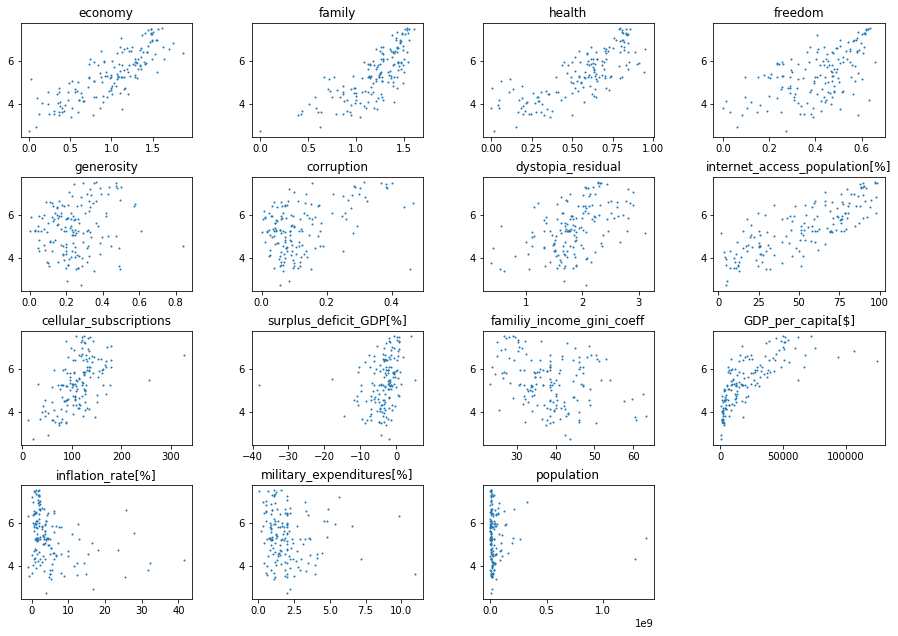

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# added
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("happiness.csv")

# fill impossible data with NaN
data.loc[data['inflation_rate[%]'] > 100, 'inflation_rate[%]'] = np.nan

# drop useless columns
data.drop(columns=['country', 'happiness_rank', 'map_reference', \
                   'biggest_official_language'], inplace=True)

# replace NaNs with column-mean
data.fillna(data.mean(), inplace=True);

# set target
y = data.loc[:,'happiness_score']

s = 1
%matplotlib inline
plt.subplot(4, 4, 1)
plt.scatter(data.loc[:,'economy'], y, s)
plt.title('economy')
plt.subplot(4, 4, 2)
plt.scatter(data.loc[:,'family'], y, s)
plt.title('family')
plt.subplot(4, 4, 3)
plt.scatter(data.loc[:,'health'], y, s)
plt.title('health')
plt.subplot(4, 4, 4)
plt.scatter(data.loc[:,'freedom'], y, s)
plt.title('freedom')
plt.subplot(4, 4, 5)
plt.scatter(data.loc[:,'generosity'], y, s)
plt.title('generosity')
plt.subplot(4, 4, 6)
plt.scatter(data.loc[:,'corruption'], y, s)
plt.title('corruption')
plt.subplot(4, 4, 7)
plt.scatter(data.loc[:,'dystopia_residual'], y, s)
plt.title('dystopia_residual')
plt.subplot(4, 4, 8)
plt.scatter(data.loc[:,'internet_access_population[%]'], y, s)
plt.title('internet_access_population[%]')
plt.subplot(4, 4, 9)
plt.scatter(data.loc[:,'cellular_subscriptions'], y, s)
plt.title('cellular_subscriptions')
plt.subplot(4, 4, 10)
plt.scatter(data.loc[:,'surplus_deficit_GDP[%]'], y, s)
plt.title('surplus_deficit_GDP[%]')
plt.subplot(4, 4, 11)
plt.scatter(data.loc[:,'familiy_income_gini_coeff'], y, s)
plt.title('familiy_income_gini_coeff')
plt.subplot(4, 4, 12)
plt.scatter(data.loc[:,'GDP_per_capita[$]'], y, s)
plt.title('GDP_per_capita[$]')
plt.subplot(4, 4, 13)
plt.scatter(data.loc[:,'inflation_rate[%]'], y, s)
plt.title('inflation_rate[%]')
plt.subplot(4, 4, 14)
plt.scatter(data.loc[:,'military_expenditures[%]'], y, s)
plt.title('military_expenditures[%]')
plt.subplot(4, 4, 15)
plt.scatter(data.loc[:,'population'], y, s)
plt.title('population')

plt.subplots_adjust(top=2, bottom=0, left=0, right=2, hspace=0.35, wspace=0.35)

\setlength{\parindent}{0in}
After looking at the plots, I now present these out of the gut conclusions:
\begin{enumerate}\itemsep-.3em
    \item economy: positive linear correlation
    \item family: positive linear/quadratic correlation
    \item health: positive linear correlation
    \item freedom: linear / quadratic / cubic correlation
    \item generosity: weak quadratic correlation / no correlation
    \item corruption: quadratic correlation / no correlation
    \item dystopia residual: no correlation
    \item internet acces population $\left[ \% \right]$: positive linear correlation / cubic correlation
    \item cellular subscriptions: quadratic correlation
    \item surplus deficit GDP $\left[ \% \right]$: no correlation
    \item family income gini coeff: no correlation / weak negative linear correlation
    \item GDP per capital $\left[ \$ \right]$: quadratic correlation
    \item inflation rate $\left[ \% \right]$: no correlation
    \item military expenditures $\left[ \% \right]$: no correlation
    \item population: no correlation
\end{enumerate}
\newpage

# Q2.2

Load data and set up packages

In [2]:
from sklearn.kernel_ridge import KernelRidge
# not needed from the template
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RepeatedKFold

# added
from sklearn.model_selection import cross_val_score

Check the dataset for missing values and, if any are found, address them programmatically

In [3]:
# Unwanted columns were dropped, extreme outliers
# were replaced with NaNs and NaNs were eventually
# replaced by their column means before plotting.

## Linear model

In [4]:
X = data.iloc[:,1:].copy()

# compute corrcoef
print("\n%-13sCorrcoef:"%(""))
for x in range(0,len(X.columns)):
    cc = np.ma.corrcoef(X.iloc[:,x], y)[1][0]
    print("%-30s: %.3f"% (X.columns[x], cc), end=" "),
    if (np.abs(cc) < 0.3):
        print("<- no correlation, drop candidate")
    else:
        print("")

# carefully drop possibly uncorrelated columns
X.drop(columns=['surplus_deficit_GDP[%]', 'military_expenditures[%]', \
                'population'], inplace=True);

# function to compute the VIF
def VIF_scores(K):
    cc = np.corrcoef(K, rowvar=False)
    VIF = np.linalg.inv(cc)
    print("\n%-16sVIF:"%(""))
    for x in range(0,len(K.columns)):
        print("%-30s: %.3f"%(K.columns[x], VIF.diagonal()[x]), end=" ")
        if (VIF.diagonal()[x] > 5):
            print("<- VIF too high")
        else:
            print("")

# compute VIF
VIF_scores(X)

# drop features with VIF too high
X.drop(columns=['internet_access_population[%]'], inplace=True)
X.drop(columns=['GDP_per_capita[$]'], inplace=True)

# compute updated VIF
VIF_scores(X)

#define model
kr = KernelRidge(alpha=1e-6, kernel='linear', gamma=None, coef0=1, kernel_params=None)

# compute R^2
print("\nR_sqrd:", kr.fit(X,y).score(X,y))

# cross-validation
scores = cross_val_score(kr, X, y, cv=5)
print("\n5-fold cross validation (R_sqrd):\n", scores)


             Corrcoef:
economy                       : 0.812 
family                        : 0.753 
health                        : 0.782 
freedom                       : 0.570 
generosity                    : 0.155 <- no correlation, drop candidate
corruption                    : 0.429 
dystopia_residual             : 0.475 
internet_access_population[%] : 0.791 
cellular_subscriptions        : 0.508 
surplus_deficit_GDP[%]        : 0.282 <- no correlation, drop candidate
familiy_income_gini_coeff     : -0.303 
GDP_per_capita[$]             : 0.719 
inflation_rate[%]             : -0.329 
military_expenditures[%]      : -0.128 <- no correlation, drop candidate
population                    : -0.032 <- no correlation, drop candidate

                VIF:
economy                       : 11.015 <- VIF too high
family                        : 2.275 
health                        : 4.629 
freedom                       : 1.934 
generosity                    : 1.311 
corruption            

\paragraph{Summary} Plotting wasn't enough insight for me. Therefore, the correlation coefficients for each variable were calculated and factors that do not correlate were considered candidates to be tossed. Just as a note: one has to be really brave to fit a line through some of the plots, but at this point I had no other strategy to build my model. E.g., I tried to find transformations for a better fit of the linear model, but couldn't find any.\newline

Selecting factors before the cross-validation (CV) process is not a good idea and should be ideally done during the CV process [1]. Eventually, I carefully removed the drop candidates one by one and concluded that all could be tossed except for the 'generosity' factor.

Next, the variance inflation factor (VIF) was calculated to check for multicolinearity (i.e., to check if independent variables are correlated among each other). A VIF of 1 is good, a VIF between 5 and 10 indicates high correlation and might be a problem. From the first VIF computations (see the first VIF table above) 3 variables indicate too much correlation.\newline
Dropping the 'economy' factor with a VIF over 10 seems reasonable at first but is a bad idea, because it leads to siginficant drops in the CV eventually. This might be because the correlation for 'economy' is the strongest among all independent variables to the dependent variable. Dropping the 'internet access population' and 'GDP per capita' variables with bad VIFs leads to an even better model (although, the 'economy' factor is still too high in the second VIF table above). Like the 'economy' variable, the 'internet access population' and 'GDP per capita' variables highly correlate with the happiness score, but do not impair the final results when being removed after the VIF check.\newline

Model parameters: the best $\alpha = 10^{-6}$, $\gamma$ has no effect on the result.\newline

\textbf{References:}\newline

[1] T. Hastie, The Elements of Statisitcal Learning, Chapter 7.10.2 The wrong and right way to do Cross-validation\newline

Strategies for optimizing the linear model:\newline
\url{https://www.youtube.com/watch?v=dQNpSa-bq4M&list=PLIeGtxpvyG-IqjoU8IiF0Yu1WtxNq_4z-&index=1}\newline

cross_val_score code:\newline
\url{https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html}\newline
VIF code:\newline
\url{https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python}\newline



## Quadratic model


In [5]:
X = data.iloc[:,1:].copy();

############################
## Spearman corrcoef code ##
############################
# from scipy.stats import spearmanr

#print("\n%-13sCorrcoef:"%(""))
#for x in range(1,len(data.columns)):
#    cc = spearmanr(data.iloc[:,x], y)
#    print("%-30s: corr.: %.3f, p-value: %.2e"% (data.columns[x],cc[0],cc[1]),end=" "),
#    if (np.abs(cc[0]) < 0.3):
#        print("<- no correlation, drop candidate")
#    else:
#        print("")

# carefully drop possibly uncorrelated features 
X.drop(columns=['familiy_income_gini_coeff', \
                'military_expenditures[%]', 'population'], inplace=True)
# additional careful drops
X.drop(columns=['internet_access_population[%]'], inplace=True)
X.drop(columns=['GDP_per_capita[$]'], inplace=True)

# model definition
kr = KernelRidge(alpha=1e-8, kernel='poly', gamma=1e-5, coef0=1, degree=2)

# compute R^2
print("\nR_sqrd:", kr.fit(X,y).score(X,y))

# cross-validation
scores = cross_val_score(kr, X, y, cv=5)
print("\n5-fold cross validation (R_sqrd):\n", scores)



R_sqrd: 0.9999999209795366

5-fold cross validation (R_sqrd):
 [0.99999834 0.99999628 0.99998579 0.99999333 0.99999149]


\paragraph{Summary} Like in the linear model, correlations between factors were also considered. However, this time around, the Spearman correlation coefficient for nonlinear correlations was used. The results are similar to the Pearsons method in the linear model. Since the Spearman method is not included in numpy, scipy had to be used and since incorporating other packages is not allowed, I only present the results in the table below.\newline

\begin{tabular}{|l|c|c|l|}
\hline
feature & corrcoef & p-value & result\\
\hline
economy                       & 0.825 & 9.36e-40 &\\
family                        & 0.774 & 4.00e-32 &\\
health                        & 0.788 & 5.37e-34 &\\
freedom                       & 0.556 & 5.81e-14 &\\
generosity                    & 0.136 & 9.05e-02 & no correlation, drop candidate\\
corruption                    & 0.301 & 1.42e-04 &\\
dystopia\_residual             & 0.504 & 2.41e-11 &\\
internet\_access\_population$\left[\%\right]$ & 0.792 & 1.26e-34 &\\
cellular\_subscriptions        & 0.553 & 8.50e-14 &\\
surplus\_deficit\_GDP$\left[\%\right]$        & 0.408 & 1.33e-07 &\\
familiy\_income\_gini\_coeff     & -0.285 & 3.30e-04 & no correlation, drop candidate\\
GDP\_per\_capita$\left[\$\right]$             & 0.827 & 3.45e-40 &\\
inflation\_rate$\left[\%\right]$             & -0.372 & 1.85e-06 &\\
military\_expenditures$\left[\%\right]$      & -0.196 & 1.43e-02 & no correlation, drop candidate\\
population                    & -0.108 & 1.81e-01 & no correlation, drop candidate\\
\hline
\end{tabular}
\hspace{.4cm}

From this insight removing all drop candidates except for 'generosity' did not affect the quality of the model. Addiditonally, removing 'internet access population' and 'GDP per capita', like in the linear model, did not impair the model and made scaling unnecessary.\newline

Model parameters: best $\alpha = 10^{-8}$, best $\gamma = 10^{-5}$

## Gaussian model

In [6]:
X = data.iloc[:,1:].copy();

# model definition
kr = KernelRidge(alpha=1e-8, kernel='rbf', gamma=1e-6, kernel_params=None)

# compute R^2
print("\nR_sqrd:", kr.fit(X,y).score(X,y))

# cross-validation
scores = cross_val_score(kr, X, y, cv=5)
print("\n5-fold cross validation (R_sqrd):\n", scores)

print("\n\n## With feature scaling:")

# scale features
scaler = StandardScaler().fit(X)
temp = scaler.transform(X)
X = pd.DataFrame(data=temp, index=X.index, columns=X.columns)

# recompute R^2
print("\nR_sqrd:", kr.fit(X,y).score(X,y))

# redo cross-validation
scores = cross_val_score(kr, X, y, cv=5)
print("\n5-fold cross validation (R_sqrd):\n", scores)


R_sqrd: 0.999995457664676

5-fold cross validation (R_sqrd):
 [ -344.01071139  -849.2932515  -1105.29309945  -399.93350013
  -102.85021507]


## With feature scaling:

R_sqrd: 0.9999999430168296

5-fold cross validation (R_sqrd):
 [0.99999911 0.99999702 0.99999503 0.99999781 0.99999923]


\paragraph{Summary} For the Gaussian model I did not remove any features and did not get any 'matrix is near singular' warnings, due to the nature of the model. I had to scale the features eventually in order to get a usable model. I used up all my research power in the linear model. Therefore, I didn't investigate as much here and do not have too much to say.\newline

Model parameters: best $\alpha = 10^{-8}$, best $\gamma = 10^{-6}$

## Comparison

All models worked surprisingly well eventually. So well, that it might be reasonable to become suspicious (keyword: overfitting). Since all models work well, I would say the linear model is the best since it is the simplest model among the three.